# DSO105 Intermediate Statistics L4 Hands On Part 1 - R

In [1]:
## packages
install.packages('tidyverse')
install.packages('rcompanion')
install.packages('car')
library(tidyverse)
library(rcompanion)
library(car)

also installing the dependencies ‘bit’, ‘sass’, ‘bit64’, ‘bslib’, ‘jquerylib’, ‘tinytex’, ‘assertthat’, ‘blob’, ‘DBI’, ‘gargle’, ‘ids’, ‘vroom’, ‘tzdb’, ‘rmarkdown’, ‘selectr’, ‘dbplyr’, ‘dtplyr’, ‘forcats’, ‘googledrive’, ‘googlesheets4’, ‘haven’, ‘lubridate’, ‘modelr’, ‘readr’, ‘reprex’, ‘rvest’





The downloaded binary packages are in
	/var/folders/17/1s12c7d93tz_93j94s44qsl40000gn/T//RtmpfiUEME/downloaded_packages

The downloaded binary packages are in
	/var/folders/17/1s12c7d93tz_93j94s44qsl40000gn/T//RtmpfiUEME/downloaded_packages

The downloaded binary packages are in
	/var/folders/17/1s12c7d93tz_93j94s44qsl40000gn/T//RtmpfiUEME/downloaded_packages


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




In [8]:
install.packages('readxl')


The downloaded binary packages are in
	/var/folders/17/1s12c7d93tz_93j94s44qsl40000gn/T//RtmpfiUEME/downloaded_packages


In [9]:
library('readxl')

In [13]:
## data
data = read_excel('../Data/Oranges.xlsx')

New names:
• `` -> `...1`


In [14]:
head(data)

...1,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0,conventional,2015,NewYork
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0,conventional,2015,NewYork
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0,conventional,2015,NewYork
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0,conventional,2015,NewYork
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0,conventional,2015,NewYork
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0,conventional,2015,NewYork


## Question: Does the average price of avocados differ between New York, Dallas, and Seattle?

### Data wrangling

In [28]:
sales = na.omit(data %>% filter(region %in% c("NewYork", "Dallas", "Seattle")))

In [29]:
sales$AveragePrice = as.numeric(sales$AveragePrice)

### Assumptions
#### Normality

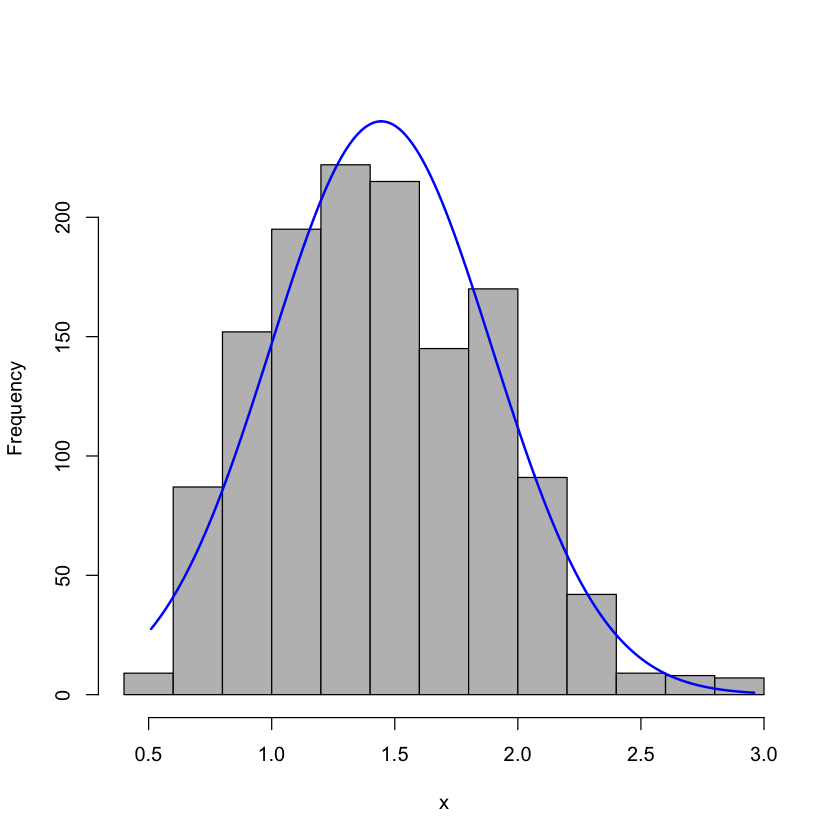

In [30]:
 plotNormalHistogram(sales$AveragePrice)
## a little positively skewed

In [31]:
sales$AveragePriceSQRT = sqrt(sales$AveragePrice)
## take the square root to attempt to adjust

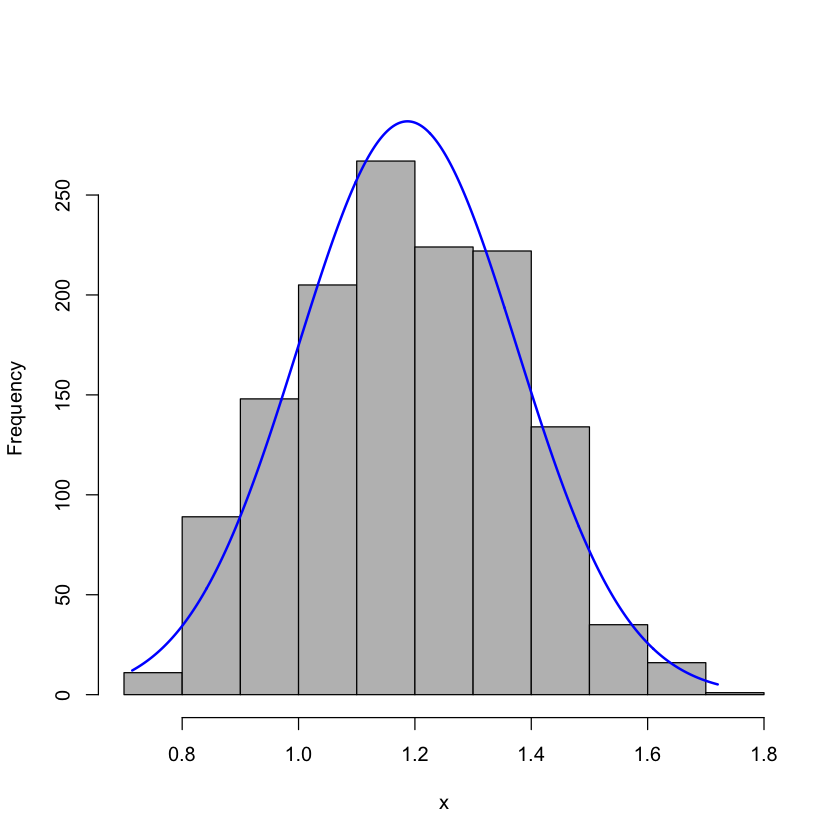

In [32]:
plotNormalHistogram(sales$AveragePriceSQRT)
## looks more approx. normal - still try log

In [33]:
sales$AveragePriceLOG = log(sales$AveragePrice)
## take the log to attempt to adjust

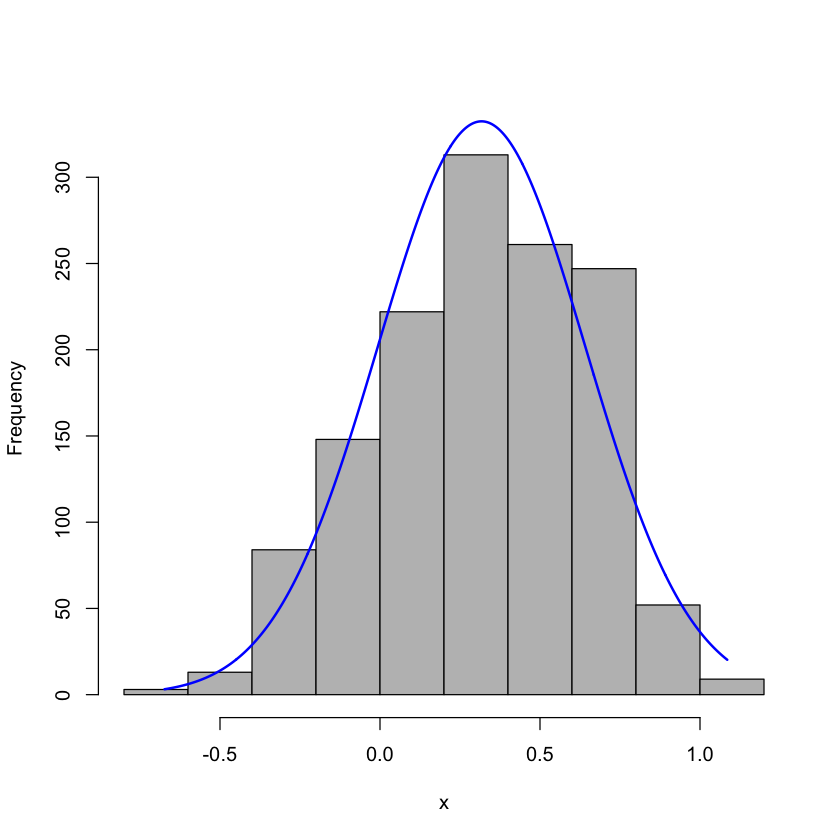

In [34]:
plotNormalHistogram(sales$AveragePriceLOG)
## maybe a little better - but the sqrt is much less dramatic a transformation, so let's go with AveragePriceSQRT

#### Homogeneity of Variance

In [35]:
bartlett.test(AveragePriceSQRT ~ region, data= sales)


	Bartlett test of homogeneity of variances

data:  AveragePriceSQRT by region
Bartlett's K-squared = 43.389, df = 2, p-value = 3.785e-10


#### ANOVA

In [36]:
ANOVA = lm(AveragePriceSQRT ~ region, data= sales)

In [37]:
Anova(ANOVA, Type="II", white.adjust=TRUE)

Coefficient covariances computed by hccm()



,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>
region,2,372.1828,1.91888e-129
Residuals,1349,NA,NA


### Interpret Results

In [38]:
pairwise.t.test(sales$AveragePriceSQRT, sales$region, p.adjust = "bonferroni", pool.sd = FALSE)


	Pairwise comparisons using t tests with non-pooled SD 

data:  sales$AveragePriceSQRT and sales$region 

        Dallas  NewYork
NewYork < 2e-16 -      
Seattle < 2e-16 3.5e-13

P value adjustment method: bonferroni 

In [39]:
salesMeans = sales %>% group_by(region) %>% summarize(Mean = mean(AveragePrice))

In [40]:
salesMeans

region,Mean
<chr>,<dbl>
Dallas,1.047929
NewYork,1.644305
Seattle,1.442574


## The average price varies amongst all three regions. 

## NewYork has an average price of $1.64 

## Seattle with $1.44

## and Houston at $1.05.